In [4]:
import numpy as np
import pandas as pd
from math import log2, sqrt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import shuffle
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [2]:

file_path = 'GeneratedRandomBits.txt'

with open(file_path, 'r') as file:
    data = file.readlines()

# Split data into sequences and labels
sequences = []
labels = []

for line in data:
    sequence, label = line.strip().split()  
    sequences.append(sequence)
    labels.append(int(label))

df = pd.DataFrame({'sequence': sequences, 'label': labels})
# shuffle 
df = shuffle(df).reset_index(drop=True)
X = np.array([list(map(int, seq)) for seq in df['sequence']])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 72.95%


Gradient Boosting Accuracy: 72.95%


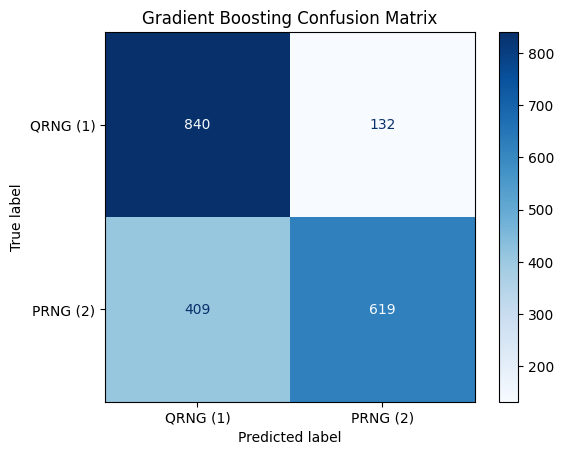

Random Forest Accuracy: 72.15%


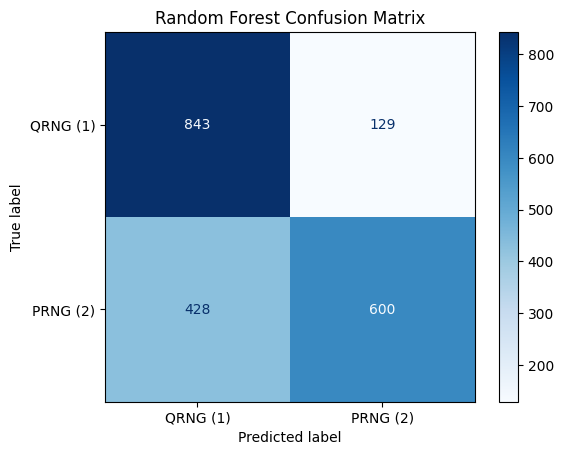

Neural Network Accuracy: 64.70%


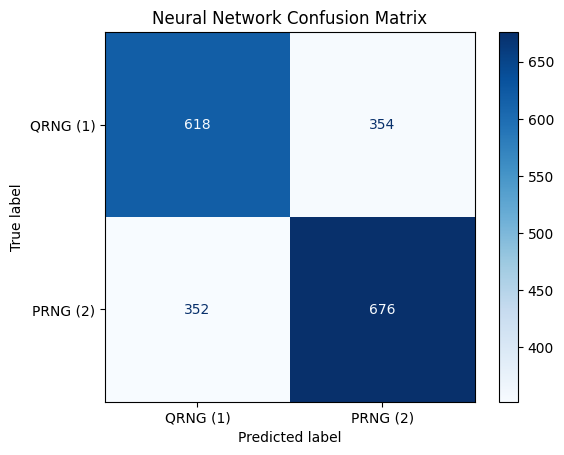

Gradient Boosting model meets the target accuracy.
Random Forest model meets the target accuracy.
Neural Network model meets the target accuracy.


In [5]:
models = {
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Neural Network": MLPClassifier(random_state=42, max_iter=500)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy * 100:.2f}%')
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["QRNG (1)", "PRNG (2)"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{name} Confusion Matrix')
    plt.show()

# Check if any model meets the target accuracy
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy >= 0.60:
        print(f"{name} model meets the target accuracy.")
    else:
        print(f"{name} model does not meet the target accuracy.")


### GRIDSEARCH for Random Forest

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; tot

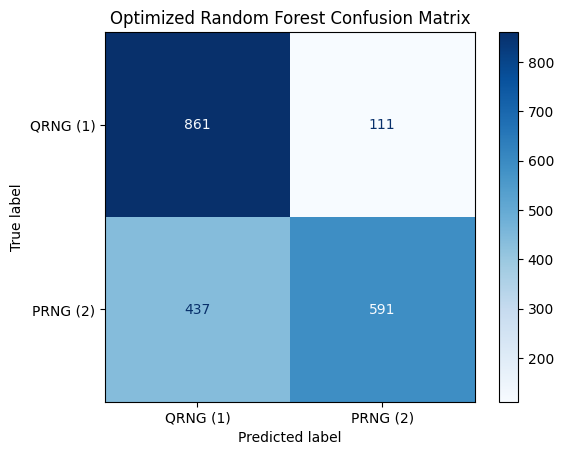

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# parameters for gridsearch
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# fit 
grid_search.fit(X_train, y_train)

# best params 
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_accuracy * 100:.2f}%")

# eval
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy with Best Random Forest: {final_accuracy * 100:.2f}%")

# CM
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["QRNG (1)", "PRNG (2)"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Optimized Random Forest Confusion Matrix')
plt.show()


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.6s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.7s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.8s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.9s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total

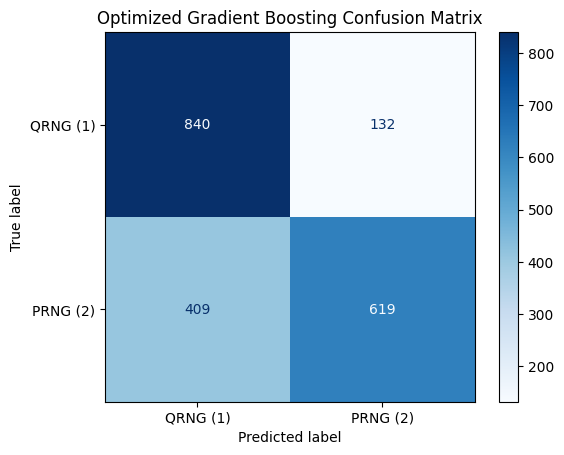

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

gb_model = GradientBoostingClassifier(random_state=42)

grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=2)
grid_search_gb.fit(X_train, y_train)
best_params_gb = grid_search_gb.best_params_
best_accuracy_gb = grid_search_gb.best_score_

print(f"Best Parameters (Gradient Boosting): {best_params_gb}")
print(f"Best Cross-Validation Accuracy (Gradient Boosting): {best_accuracy_gb * 100:.2f}%")

# Evaluate the best Gradient Boosting model on the test set
best_gb_model = grid_search_gb.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)
final_accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Test Set Accuracy with Best Gradient Boosting: {final_accuracy_gb * 100:.2f}%")

# Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=["QRNG (1)", "PRNG (2)"])
disp_gb.plot(cmap=plt.cm.Blues)
plt.title('Optimized Gradient Boosting Confusion Matrix')
plt.show()
